<a href="https://colab.research.google.com/github/Pranayshukla0610/Web-Scraping-Python/blob/main/Web_Scraping_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 lxml

In [2]:
import requests
from bs4 import BeautifulSoup

url = "http://quotes.toscrape.com"
response = requests.get(url)

soup = BeautifulSoup(response.text, "lxml")
quotes = soup.find_all("span", class_="text")

for quote in quotes:
  print(quote.text)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [3]:
all_quotes = []

for page in range(1,6):
  url = f"http://quotes.toscrape.com/page/{page}/"
  response = requests.get(url)
  soup = BeautifulSoup(response.text,"lxml")

  quotes = soup.find_all("span", class_="text")

  for q in quotes:
    all_quotes.append(q.text)

In [4]:
len(all_quotes)

50

In [6]:
url = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops"

response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")

items = soup.find_all("div", class_="thumbnail")

data = []

for item in items:
    title = item.find("a", class_="title").text.strip()
    price = item.find("h4", class_="price").text.strip()
    rating = len(item.find_all("span", class_="glyphicon-star"))

    data.append([title, price, rating])

import pandas as pd

df = pd.DataFrame(data, columns=["Title", "Price", "Rating"])
df.head()


,Title,Price,Rating
0,Packard 255 G2,$416.99,0
1,Aspire E1-510,$306.99,0
2,ThinkPad T540p,$1178.99,0
3,ProBook,$739.99,0
4,ThinkPad X240,$1311.99,0


In [8]:
df['Price'] = df['Price'].astype(str).str.replace(r"[^0-9.]","",regex=True).astype(float)
df['Title_Length'] = df['Title'].apply(len)
df['High_Rated'] = df['Rating'].apply(lambda x:1 if x>=4 else 0)
df.head()

,Title,Price,Rating,Title_Length,High_Rated
0,Packard 255 G2,416.99,0,14,0
1,Aspire E1-510,306.99,0,13,0
2,ThinkPad T540p,1178.99,0,14,0
3,ProBook,739.99,0,7,0
4,ThinkPad X240,1311.99,0,13,0


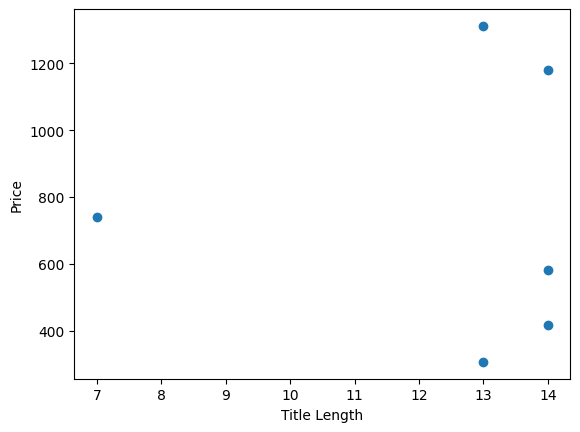

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['Title_Length'],df['Price'])
plt.xlabel('Title Length')
plt.ylabel('Price')
plt.show()

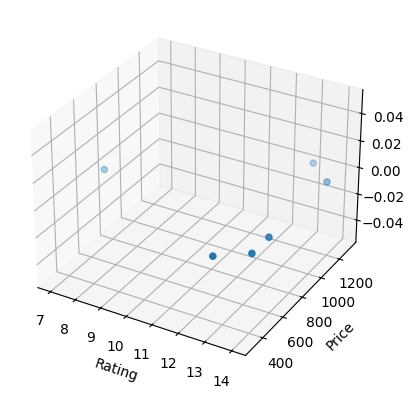

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Title_Length'],df['Price'],df['Rating'])

ax.set_xlabel('Title Length')
ax.set_ylabel('Price')
ax.set_xlabel('Rating')
plt.show()

In [11]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.3/510.3 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully uninstalled urllib3-2.5.0


In [11]:
!apt-get update -y
!apt-get install -y chromium
!pip install -U selenium


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package chromium is not available, but is referred to by another package.
This may mean that t

In [13]:
import selenium
print(selenium.__version__)

4.40.0


In [14]:
!pip install -U selenium

In [16]:
!which chromium
!which chromium-browser

/usr/bin/chromium-browser


In [18]:
!pip install playwright
!playwright install chromium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 11.7 MB/s eta 0:00:00
(node:10976) [DEP0169] DeprecationWarning: `url.parse()` behavior is not standardized and prone to errors that have security implications. Use the WHATWG URL API instead. CVEs are not issued for `url.parse()` vulnerabilities.
(Use `node --trace-deprecation ...` to show where the warning was created)
167.3 MiB [] 0% 0.0s167.3 MiB [] 0% 18.9s167.3 MiB [] 0% 12.1s167.3 MiB [] 0% 11.6s167.3 MiB [] 1% 5.8s167.3 MiB [] 1% 5.1s167.3 MiB [] 2% 4.6s167.3 MiB [] 2% 4.5s167.3 MiB [] 3% 3.8s167.3 MiB [] 4% 3.3s167.3 MiB [] 4% 3.2s167.3 MiB [] 5% 3.2s167.3 MiB [] 5% 3.1s167.3 MiB [] 6% 3.1s167.3 MiB [] 7% 3.1s167.3 MiB [] 8% 3.0s167.3 MiB [] 9% 2.8s167.3 MiB [] 10% 2.7s167.3 MiB [] 11% 2.5s167.3 MiB [] 12% 2.5s167.3 MiB [] 12% 2.4s167.3 MiB [] 13% 2.4s167.3 MiB [] 14% 2.3s167.3 MiB [] 15% 2.3s167.3 MiB [] 16% 2.2s167.3 MiB [] 17% 2.1s167.3 MiB [] 18% 2.0s167.3 MiB [] 19% 2.0s167.3 MiB [] 20% 2.0s167.3 MiB [] 21% 1.9s167.

In [21]:
!apt-get update
!apt-get install -y \
  libatk-bridge2.0-0 \
  libatk1.0-0 \
  libcups2 \
  libdrm2 \
  libxkbcommon0 \
  libxcomposite1 \
  libxdamage1 \
  libxfixes3 \
  libxrandr2 \
  libgbm1 \
  libpango-1.0-0 \
  libcairo2 \
  libasound2

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2 is already the newest version (1.2.6.1-1ubuntu1).
libasound2 set to manually instal

In [22]:
!pip install -U playwright
!playwright install chromium


In [23]:
from playwright.async_api import async_playwright

async def scrape():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto("https://quotes.toscrape.com/js")
        await page.wait_for_selector(".text")

        quotes = await page.query_selector_all(".text")
        for q in quotes:
            print(await q.inner_text())

        await browser.close()

await scrape()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [24]:
!pip install aiohttp asyncio

In [26]:
import aiohttp
import asyncio
from bs4 import BeautifulSoup

async def fetch(session, url):
    async with session.get(url) as response:
        return await response.text()

async def main():
    urls = [
        "http://quotes.toscrape.com/page/1",
        "http://quotes.toscrape.com/page/2"
    ]

    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session, url) for url in urls]
        pages = await asyncio.gather(*tasks)

        for page in pages:
            soup = BeautifulSoup(page, "lxml")
            quotes = soup.find_all("span", class_="text")

            for q in quotes:
                print(q.text)

await main()


“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a unive

In [27]:
!pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.7/331.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 11.0 MB/s eta 0:00:00


In [28]:
import scrapy
class QuoteSpider(scrapy.Spider):
  name="quotes"
  start_urls = ["http://quotes.toscrape.com"]

  def parse(self, response):
    for quote in response.css('div.quote'):
      yield {
          "text":quote.css("span.text::text").get()
      }

In [30]:
!pip install kaggle
